<a href="https://colab.research.google.com/github/k-washi/GoogleColab_ML/blob/master/fashion_Mnist_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.15.0


# データのインポート

Fashion mnistのデータをimportする。


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_imgs, train_labels), (test_imgs, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
train_imgs.shape

(60000, 28, 28)

In [4]:
len(train_labels)

60000

In [5]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_imgs.shape

(10000, 28, 28)

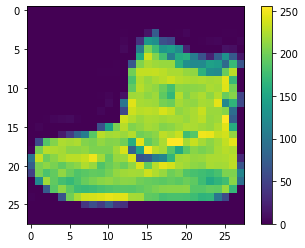

In [8]:
plt.figure()
plt.imshow(train_imgs[0])
plt.colorbar()
plt.grid(False)
plt.show()

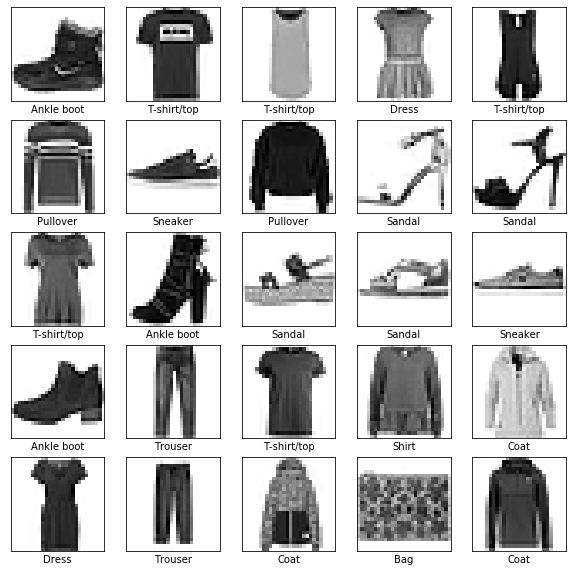

In [9]:
#データの前処理
train_imgs = train_imgs / 255.
test_imgs = test_imgs / 255.

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_imgs[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [10]:
#モデルの作成

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
model.fit(train_imgs, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 92us/sample - loss: 0.4957 - acc: 0.8267
Epoch 2/5
60000/60000 [==============================] - 4s 62us/sample - loss: 0.3723 - acc: 0.8649
Epoch 3/5
60000/60000 [==============================] - 4s 64us/sample - loss: 0.3336 - acc: 0.8778
Epoch 4/5
60000/60000 [==============================] - 4s 63us/sample - loss: 0.3100 - acc: 0.8862
Epoch 5/5
60000/60000 [==============================] - 4s 65us/sample - loss: 0.2927 - acc: 0.8919


In [16]:
test_loss, test_acc = model.evaluate(test_imgs, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 49us/sample - loss: 0.3434 - acc: 0.8770
Test accuracy: 0.877


In [18]:
pred = model.predict(test_imgs)
pred[0]
np.argmax(pred[0])

9

In [0]:

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

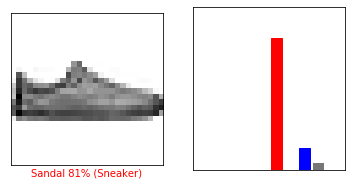

In [23]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, pred, test_labels, test_imgs)
plt.subplot(1,2,2)
plot_value_array(i, pred,  test_labels)
plt.show()

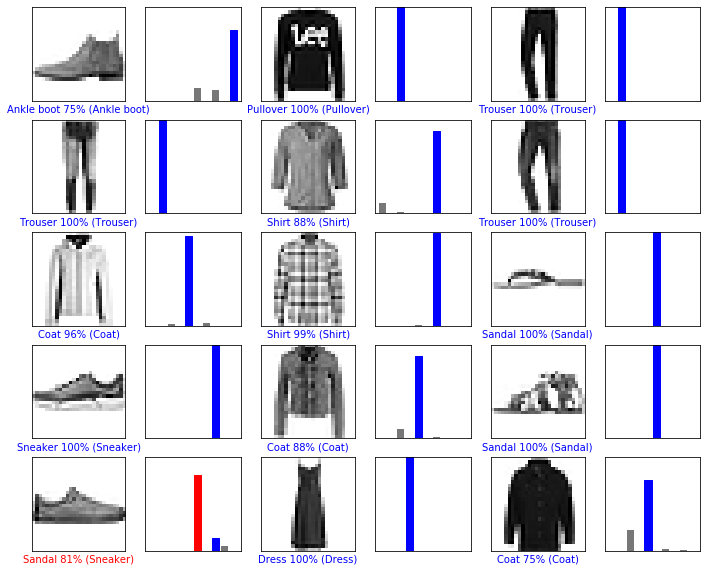

In [25]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, pred, test_labels, test_imgs)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, pred, test_labels)
plt.show()

In [27]:
img = test_imgs[0]
print(img.shape)

(28, 28)


In [28]:
img = (np.expand_dims(img, 0))
print(img.shape)

(1, 28, 28)


In [29]:
pred_sig = model.predict(img)
print(pred_sig)

[[3.4508146e-05 3.2850417e-06 3.7726024e-06 6.5142433e-07 1.2391346e-06
  1.3273422e-01 8.4063950e-06 1.1433515e-01 1.1978124e-04 7.5275904e-01]]


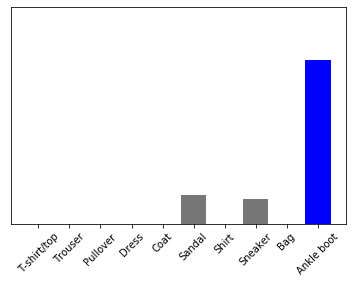

In [30]:
plt.figure()
plot_value_array(0, pred_sig, test_labels)
plt.xticks(range(10), class_names, rotation=45)
plt.show()